In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import subprocess



# Hydro Task Dario Hug #

@Files   :   visualization.ipynb / task01.cpp / task02.cpp

@Time    :   2024/12/17 13:08:54

@Author  :   Dario B. Hug

@Contact :   dariobenjamin.hug@uzh.ch

@Code    :   https://github.com/dariohug/03_Hydro_project.git

Documentation: 

In this Exercise I used c++ and python. The heavy lifting is done in c++ to make the computation as afficient as possible, while python is very handy to plot the computated data.


## General Code ##

In [156]:
def read_csv_data(path):
    data = pd.read_csv(path)
    x = data['x'].values
    times = data.columns[1:]
    return x, times


## Task 01 - Advection with first order differencing ##

First order advection equation: $ \frac{\delta f}{\delta t} + v_0 \frac{\delta f}{\delta x} = 0$ 

- Define the domain $ 0 < x < 1 $, with periodic conditions (and ghost cells if necessary). Use $ N = 100 $ points to begin with.
- The advection velocity is v0 = 1. This defines the timestep by the CFL condition as for example $ \Delta t = \frac{\Delta x}{2 v_0} $. Because $ v0 > 0 $, be careful to define the gradient ∂f/∂x in a upstream way using finite difference.
- Perform the time integration with a first order explicit scheme for the spacial derivative. Start with a first order Euler time integration, but feel free to test also higher order schemes (RK2, RK4). Test different initial profiles of f. For example a step function $ f(x,t = 0) = 1 $ if $ x < 0.4 $ for 2 if $ 0.4 < x < 0.6 $, 1 if $ x > 0.6 $, or a gaussian $ f(x,t = 0) = 1 + exp( - \frac{(x-0.5)^2}{\sigma ^2}) $ with $ \sigma = 0.1 $ for instance.
- Explore the evolution over different timescales (number of times it crosses the box), under different resolutions (N = 100, 200, 500,...). Discuss the diffusion, stability and accuracy of the scheme with varying the timestep and the space resolution.

## Task 01 - Advection with second order finite Volume (MUSCL) ##

1D Advection Equation: $\frac{\partial f}{\partial t} + v_0 \frac{\partial f}{\partial x} = 0$ 

This equation describes how a value (could for example be a temperature in a medium or a object carried in a stream) is carried along one dimension in time. $v_0$ here describes the speed of the advection, in our case we assume the speed to be positive. 

The equation is conservative. 

To approximate the results we use the firs order euler and the 


In [157]:
# C++ file name
cpp_file = "task01_dario_hug.cpp"

# Define output filename
output_file_name = "01_advection_results.csv"

# Compile the C++ file
compile_command = ["g++", cpp_file, "-o", "task01"]
compile_process = subprocess.run(compile_command, capture_output=True, text=True)

# Check if the compilation succeeded
if compile_process.returncode == 0:
    print("\033[92m---Compilation succeeded---\033[0m")
    
    # Run the compiled executable
    # This is the beauty of this setup... With a python based solver this computation would take a wile
    # Starting profiles can be "step" or "gaussian"
    run_command = ["./task01", str(10000), output_file_name, "step"] # command varys if you use different opperating system!
    run_process = subprocess.run(run_command, capture_output=True, text=True)
    
    # Display the output of the C++ program
    print(f"Output:     {run_process.stdout}")
else:
    # Display compilation errors
    print(f"\033[91mCompilation failed with errorcode:\033[0m {compile_process.stderr}")


---Compilation succeeded---
Output:     Simulations completed, results saved in: 01_advection_results.csv



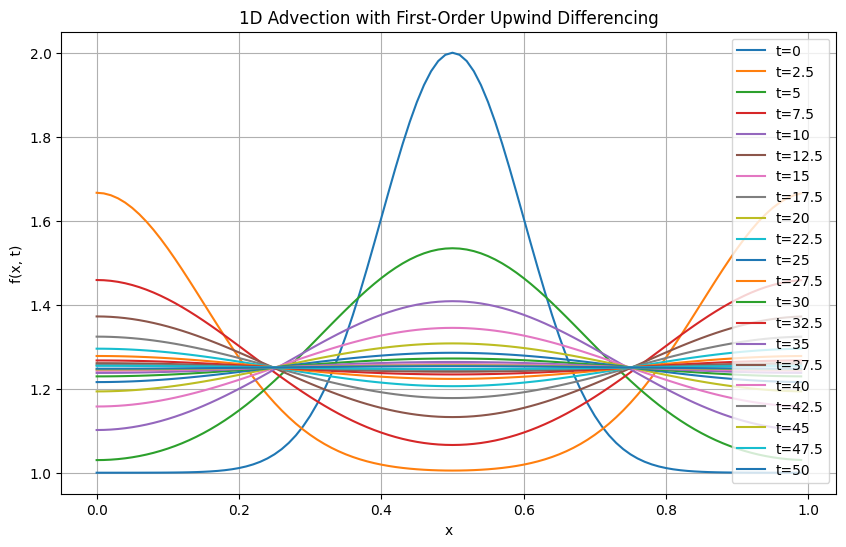

In [ ]:

# Load the CSV file
data = pd.read_csv(output_file_name)
x = data['x'].values
times = data.columns[1:]

# Plot the initial and final states
plt.figure(figsize=(10, 6))
for t in times[::500]:  # Plot every 500 timesteps for clarity
    plt.plot(x, data[t], label=t)

plt.title("1D Advection with First-Order Upwind")
plt.xlabel("x")
plt.ylabel("f(x, t)")
plt.legend()
plt.grid()
plt.show()
